In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
train = pd.read_excel('train.xlsx')

In [ ]:
train.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [ ]:
train.shape

(4548, 28)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


<Axes: ylabel='mean_price'>

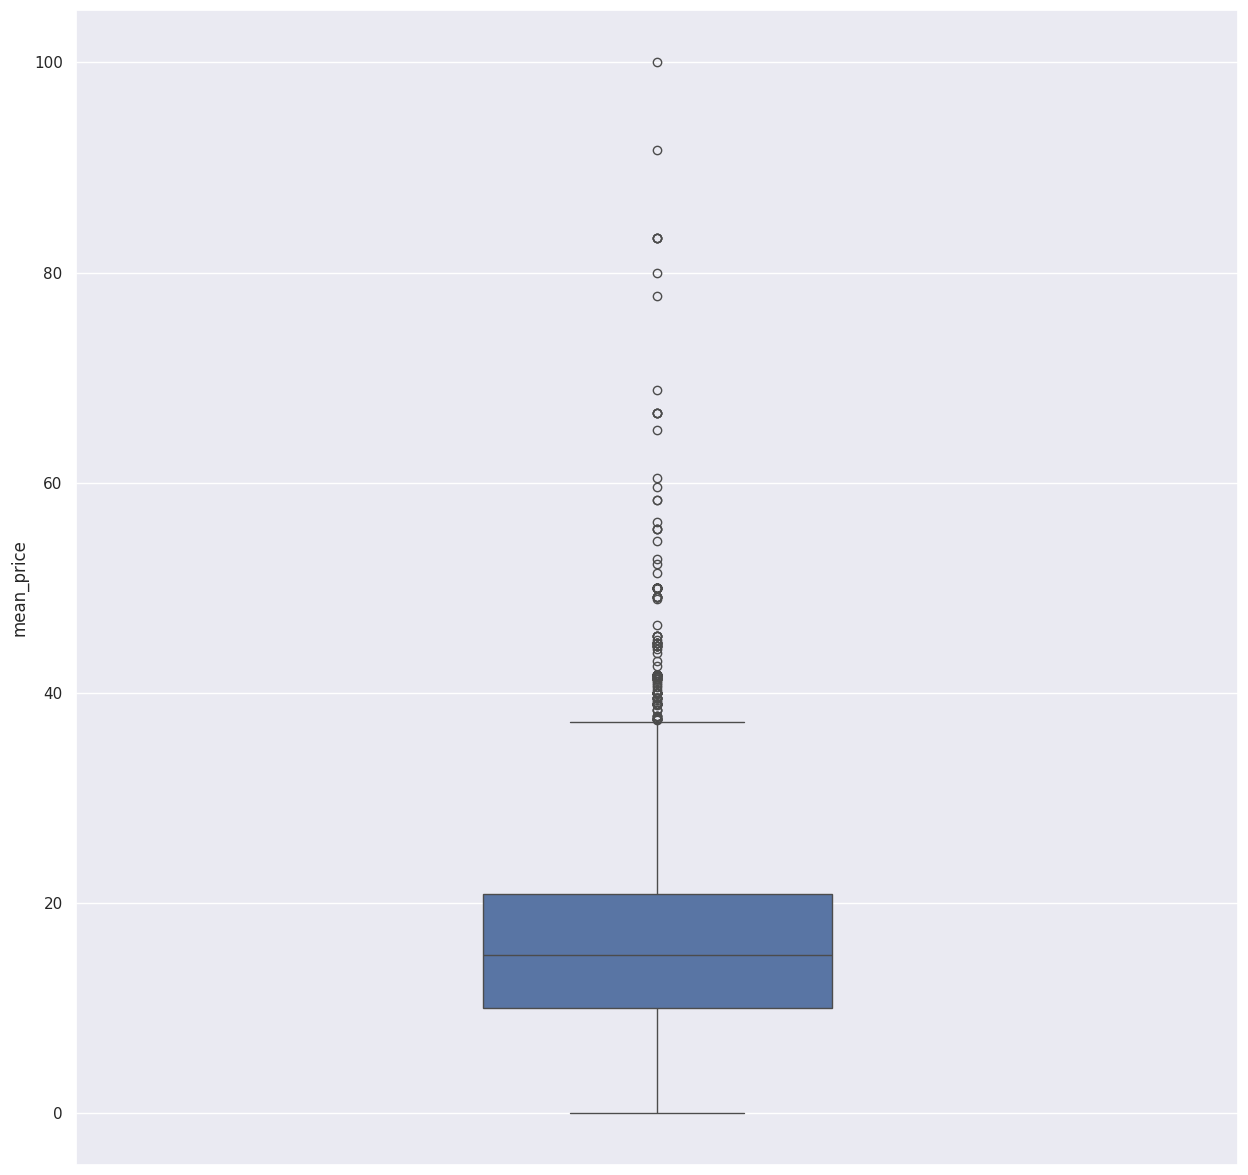

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(train['mean_price'], width=0.3)

In [ ]:
train = pd.get_dummies(train, columns = ['предмет'])
train.head()

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,False,True
2,2,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,True,False
3,3,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,False,True
4,4,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True


In [ ]:
train['status'].value_counts()

,count
status,
Частный преподаватель,2345
Студент,1288
Школьный преподаватель,558
Университетский преподаватель,129
"Частный преподаватель, Студент",92
"Университетский преподаватель, Школьный преподаватель",47
Аспирант или ординатор очной формы обучения,45
"Аспирант или ординатор очной формы обучения, Частный преподаватель",15
"Университетский преподаватель, Аспирант или ординатор очной формы обучения",13


In [ ]:
train['status'].str.get_dummies(sep=',')

,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
4543,0,0,0,1,0
4544,0,0,0,0,1
4545,0,1,0,0,0
4546,0,1,0,0,0


In [ ]:
train['experience'].unique()

array([' 31 год ', ' 8 лет ', ' 11 лет ', ' 5 лет ', ' 19 лет ',
       ' 7 лет ', ' 27 лет ', ' 9 лет ', ' 38 лет ', ' 28 лет ',
       ' 17 лет ', ' 6 лет ', ' 13 лет ', ' 45 лет ', ' 4 года ',
       ' 3 года ', ' 10 лет ', ' 2 года ', ' 14 лет ', ' 20 лет ',
       ' 18 лет ', ' 32 года ', ' 16 лет ', ' 21 год ', ' 15 лет ',
       ' 12 лет ', ' 1 год ', ' 24 года ', ' 29 лет ', ' 22 года ',
       ' 39 лет ', ' 23 года ', ' 25 лет ', ' 34 года ', nan, ' 33 года ',
       ' 43 года ', ' 36 лет ', ' 40 лет ', ' 26 лет ', ' 41 год ',
       ' 30 лет ', ' 42 года ', ' 37 лет ', ' 35 лет ', ' 47 лет ',
       ' 44 года ', ' 53 года ', ' 55 лет ', ' 68 лет ', ' 48 лет ',
       ' 52 года ', ' 50 лет ', ' 46 лет ', ' 51 год ', ' 54 года '],
      dtype=object)

In [ ]:
train['experience'] = train['experience'].str.replace(r"[^\d\.]", "", regex=True)
train['experience'] = train['experience'].astype('float64')
train['experience']

,experience
0,31.0
1,8.0
2,11.0
3,5.0
4,19.0
...,...
4543,5.0
4544,30.0
4545,6.0
4546,1.0


In [ ]:
train['categories']

,categories
0,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
3,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
...,...
4543,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4544,['Школьники с 5 по 9 класс']
4545,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
4546,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


In [ ]:
print(type(train.loc[0, 'categories']))
train.loc[0, 'categories']

<class 'str'>


"['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']"

In [ ]:
import ast
train['categories'] = train['categories'].apply(lambda s: list(ast.literal_eval(s)))

print(type(train.loc[0, 'categories']))
train.loc[0, 'categories']

<class 'list'>


['Школьники с 5 по 9 класс',
 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']

In [ ]:
mlb = MultiLabelBinarizer()

genres_encoded = mlb.fit_transform(train['categories'])
genres_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
genres_df = pd.DataFrame(genres_encoded, columns = mlb.classes_)

train = pd.concat([train, genres_df], axis = 1)
train

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,0,0,0,0,1,0,0,1,0,0
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,0,0,0,0,1,0,0,1,0,0
2,2,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,...,0,0,0,0,1,0,0,1,0,0
3,3,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,...,0,1,0,0,1,0,0,1,0,0
4,4,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4543,Репетитор по математике Пинчук Всеволод Роман...,"['Школьная программа', 'Математический анализ'...",4.0,11,Закончил ННГУ им. Николая Лобачевского...,NaN,Нижегородский государственный университет им....,"Год окончания: 2020, Факультет: физический фа...",NaN,...,0,1,0,0,1,0,0,1,0,0
4544,4544,Репетитор по информатике Травникова Ирина Нико...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Я, Травникова Ирина Николаевна, препод...",Учитель информатики в школ...,Таганрогский радиотехнический институт им.В.Д...,"Год окончания: 1979, Факультет: Факультет авт...",NaN,...,0,0,0,0,0,0,0,1,0,0
4545,4545,Репетитор по информатике Савельева Екатерина Ю...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,Готовлю учеников старших классов к сда...,Репетитор не предоставил информаци...,Московский Политехнический Университет,"Год окончания: 2020, Факультет: Информационны...",NaN,...,0,0,0,0,1,0,0,1,0,0
4546,4546,Репетитор по информатике Сардарян Артур Роберт...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выпускник медалист, студент РТУ МИРЭА,...",– полгода Изна...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Институт инфо...",NaN,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 46 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       4548 non-null   int64  
 1   ФИО                                                                              4548 non-null   object 
 2   tutor_head_tags                                                                  4548 non-null   object 
 3   tutor_rating                                                                     3959 non-null   float64
 4   tutor_reviews                                                                    4548 non-null   int64  
 5   description                                                                      4547 non-null   object 
 6   experien

In [ ]:
train.loc[11, 'description']

'        Я закончил физико-математический лицей № 131 в г. Казани, после чего поступил в МГСУ, но мой выбор оказался ошибочным. В МГСУ мне не хватало инженерной нагрузки, в связи с чем я спустя два года поступил в МГТУ им. Баумана и успешно его закончил. Главный принцип всего обучения моего собственного и как преподавателя: "бесполезно зубрить что-либо, надо понимать". Также придерживаюсь позиции что не существует единственного правильного решения. Я очень спокойный доброжелательный человек.    '

In [ ]:
train['tutor_head_tags']

,tutor_head_tags
0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
1,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
2,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
3,"['Школьная программа', 'Математический анализ'..."
4,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
...,...
4543,"['Школьная программа', 'Математический анализ'..."
4544,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
4545,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
4546,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."


In [ ]:
print(type(train.loc[11, 'tutor_head_tags']))
train.loc[11, 'tutor_head_tags']

<class 'str'>


"['Школьная программа', 'Подготовка к ОГЭ']"

In [ ]:
train['tutor_head_tags'] = train['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))

print(type(train.loc[0, 'tutor_head_tags']))
train.loc[0, 'tutor_head_tags']

<class 'list'>


['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']

In [ ]:
mlb_1 = MultiLabelBinarizer()
tags_encoded = mlb_1.fit_transform(train['tutor_head_tags'])
tags_encoded

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
tags_df = pd.DataFrame(tags_encoded, columns = mlb_1.classes_)

train = pd.concat([train, tags_df], axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 65 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       4548 non-null   int64  
 1   ФИО                                                                              4548 non-null   object 
 2   tutor_head_tags                                                                  4548 non-null   object 
 3   tutor_rating                                                                     3959 non-null   float64
 4   tutor_reviews                                                                    4548 non-null   int64  
 5   description                                                                      4547 non-null   object 
 6   experien

In [ ]:
train['Desc_Education_1']

,Desc_Education_1
0,"Год окончания: 1990, Факультет: механико-мате..."
1,"Год окончания: 2017, Факультет: факультет при..."
2,"Год окончания: 2008, Факультет: Математически..."
3,"Год окончания: 2021, Факультет: физический фа..."
4,"Год окончания: 2005, Факультет: Энергетически..."
...,...
4543,"Год окончания: 2020, Факультет: физический фа..."
4544,"Год окончания: 1979, Факультет: Факультет авт..."
4545,"Год окончания: 2020, Факультет: Информационны..."
4546,"Год окончания: 2026, Факультет: Институт инфо..."


In [ ]:
train.loc[23, 'Desc_Education_1']

' Год окончания: 2005, Факультет: механико-математический факультет, Специальность: прикладная математика, Квалификация: Квалификация - математик. '

In [ ]:
numeric_cols = train.select_dtypes(include='number').columns

numeric_cols

Index(['Unnamed: 0', 'tutor_rating', 'tutor_reviews', 'experience',
       'mean_price', 'Взрослые кроме абитуриентов и студентов',
       'Взрослые кроме абитуриентов и студентов в паре',
       'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники',
       'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов',
       'Студенты университетов в паре', 'Школьники с 1 по 4 класс',
       'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа',
       'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре',
       'Школьники с 5 по 9 класс группа', 'A-level',
       'Elementary Mathematics in English', 'GMAT (математическая часть)',
       'Higher Mathematics in English - высшая математик

In [ ]:
train = train[numeric_cols]
train

,Unnamed: 0,tutor_rating,tutor_reviews,experience,mean_price,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,0,5.0,2,31.0,16.666667,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,1,4.0,7,8.0,11.666667,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,2,0.0,0,11.0,23.333333,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,3,4.0,19,5.0,0.116667,1,0,0,0,0,...,1,0,1,1,1,0,0,1,0,1
4,4,0.0,0,19.0,16.666667,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4543,4.0,11,5.0,16.666667,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
4544,4544,0.0,0,30.0,33.333333,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4545,4545,0.0,0,6.0,23.333333,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4546,4546,0.0,0,1.0,9.722222,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
train.drop(columns = ['Unnamed: 0'], inplace = True)
train

,tutor_rating,tutor_reviews,experience,mean_price,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,5.0,2,31.0,16.666667,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,4.0,7,8.0,11.666667,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0.0,0,11.0,23.333333,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,4.0,19,5.0,0.116667,1,0,0,0,0,0,...,1,0,1,1,1,0,0,1,0,1
4,0.0,0,19.0,16.666667,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4.0,11,5.0,16.666667,0,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
4544,0.0,0,30.0,33.333333,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4545,0.0,0,6.0,23.333333,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4546,0.0,0,1.0,9.722222,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
train.isna().sum()

,0
tutor_rating,589
tutor_reviews,0
experience,25
mean_price,0
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0
Дошкольники,0
Дошкольники в паре,0
Дошкольники группа,0


In [ ]:
train['experience'] = train['experience'].fillna(train['experience'].mean())
train['tutor_rating'] = train['tutor_rating'].fillna(0)

train.isna().sum()

,0
tutor_rating,0
tutor_reviews,0
experience,0
mean_price,0
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0
Дошкольники,0
Дошкольники в паре,0
Дошкольники группа,0


<Axes: >

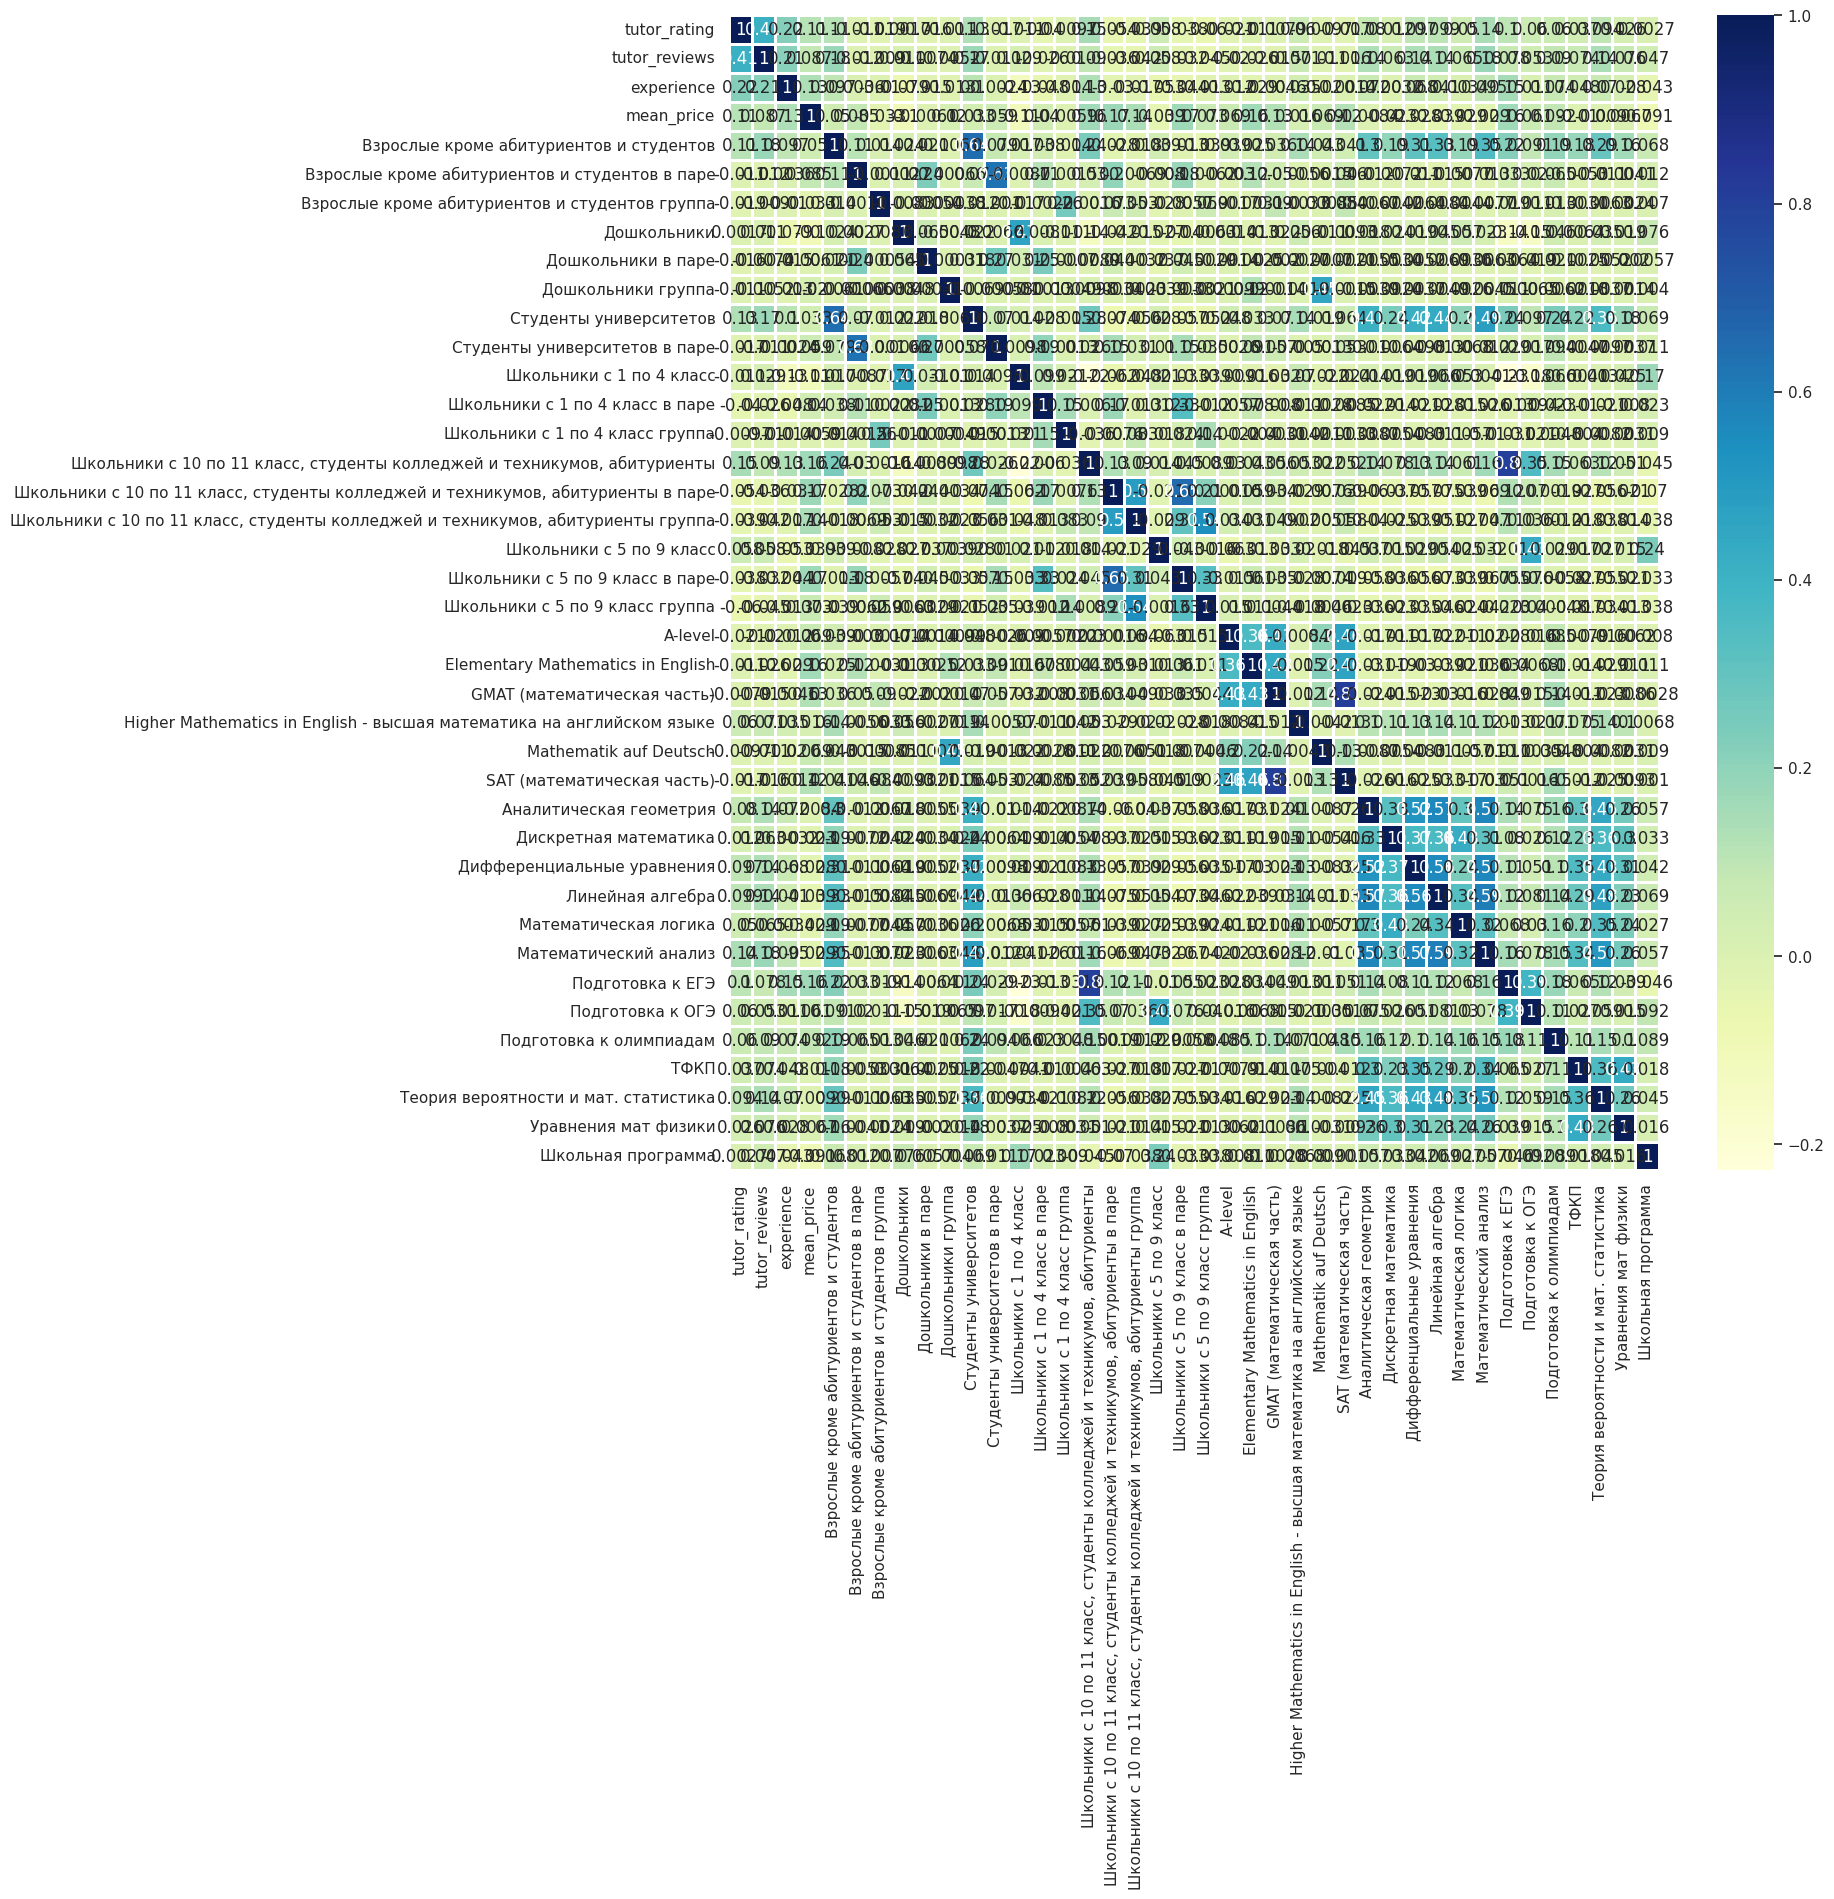

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})

sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

In [ ]:
X = train.drop(columns = ['mean_price'])
Y = train['mean_price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

print(f'Train data size:{X_train.shape}, {y_train.shape}')
print(f'Test data size: {X_test.shape}, {y_test.shape}')

Train data size:(3183, 39), (3183,)
Test data size: (1365, 39), (1365,)


In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('R^2 score: ', r2_score(y_test, y_pred))

Mean absolute error:  6.979841034637345
Mean squared error:  92.30239710983086
R^2 score:  0.15062427960948166


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
X.columns

Index(['tutor_rating', 'tutor_reviews', 'experience',
       'Взрослые кроме абитуриентов и студентов',
       'Взрослые кроме абитуриентов и студентов в паре',
       'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники',
       'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов',
       'Студенты университетов в паре', 'Школьники с 1 по 4 класс',
       'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа',
       'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре',
       'Школьники с 5 по 9 класс группа', 'A-level',
       'Elementary Mathematics in English', 'GMAT (математическая часть)',
       'Higher Mathematics in English - высшая математика на английском языке',
    

In [ ]:
test = pd.read_excel('test.xlsx')
test = pd.get_dummies(test, columns = ['предмет'])

In [ ]:
test.columns

Index(['Unnamed: 0', 'ФИО', 'tutor_head_tags', 'tutor_rating', 'tutor_reviews',
       'description', 'experience_desc', 'Education_1', 'Desc_Education_1',
       'Education_2', 'Desc_Education_2', 'Education_3', 'Desc_Education_3',
       'Education_4', 'Desc_Education_4', 'Ученая степень 1',
       'Ученое звание 1', 'status', 'experience', 'Desc_Education_5',
       'Desc_Education_6', 'Education_5', 'Education_6', 'Ученая степень 2',
       'Ученое звание 2', 'categories', 'предмет_informatika',
       'предмет_matematika'],
      dtype='object')

In [ ]:
test['experience'] = test['experience'].str.replace(r"[^\d\.]", "", regex=True)
test['experience'] = test['experience'].astype('float64')
test['experience']

,experience
0,26.0
1,4.0
2,36.0
3,3.0
4,1.0
...,...
1511,9.0
1512,14.0
1513,13.0
1514,12.0


In [ ]:
# кодируем колонку categories
test['categories'] = test['categories'].apply(lambda s: list(ast.literal_eval(s)))
# кодировщик у нас уже обучен!!! поэтому делаем только transform
genres_encoded_test = mlb.transform(test['categories'])
genres_encoded_test = pd.DataFrame(genres_encoded_test, columns=mlb.classes_)
# Соединение с исходным DataFrame
test = pd.concat([test, genres_encoded_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 45 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       1516 non-null   int64  
 1   ФИО                                                                              1516 non-null   object 
 2   tutor_head_tags                                                                  1516 non-null   object 
 3   tutor_rating                                                                     1516 non-null   int64  
 4   tutor_reviews                                                                    1516 non-null   int64  
 5   description                                                                      1515 non-null   object 
 6   experien

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


In [ ]:
test['tutor_head_tags'] = test['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))
tags_encoded_test = mlb_1.fit_transform(test['tutor_head_tags'])
tags_df_test = pd.DataFrame(tags_encoded_test, columns = mlb_1.classes_)

test = pd.concat([test, tags_df_test], axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 64 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       1516 non-null   int64  
 1   ФИО                                                                              1516 non-null   object 
 2   tutor_head_tags                                                                  1516 non-null   object 
 3   tutor_rating                                                                     1516 non-null   int64  
 4   tutor_reviews                                                                    1516 non-null   int64  
 5   description                                                                      1515 non-null   object 
 6   experien

In [ ]:
numeric_cols = test.select_dtypes(include='number').columns
test = test[numeric_cols]
test

,Unnamed: 0,tutor_rating,tutor_reviews,experience,Desc_Education_6,Education_6,Ученое звание 2,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,0,4,13,26.0,NaN,NaN,NaN,1,0,0,...,0,0,0,1,1,1,0,0,0,1
1,1,0,0,4.0,NaN,NaN,NaN,0,0,0,...,1,0,1,1,1,0,0,0,0,1
2,2,0,0,36.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,3,4,11,3.0,NaN,NaN,NaN,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,0,0,1.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,0,0,9.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1512,1512,0,0,14.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1513,1513,0,0,13.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1514,1514,4,32,12.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
test.isna().sum()

,0
Unnamed: 0,0
tutor_rating,0
tutor_reviews,0
experience,10
Desc_Education_6,1516
Education_6,1516
Ученое звание 2,1516
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0


In [ ]:
test['experience'] = test['experience'].fillna(test['experience'].mean())
test['tutor_rating'] = test['tutor_rating'].fillna(0)

test

,Unnamed: 0,tutor_rating,tutor_reviews,experience,Desc_Education_6,Education_6,Ученое звание 2,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,0,4,13,26.0,NaN,NaN,NaN,1,0,0,...,0,0,0,1,1,1,0,0,0,1
1,1,0,0,4.0,NaN,NaN,NaN,0,0,0,...,1,0,1,1,1,0,0,0,0,1
2,2,0,0,36.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,3,4,11,3.0,NaN,NaN,NaN,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,0,0,1.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,0,0,9.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1512,1512,0,0,14.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1513,1513,0,0,13.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1514,1514,4,32,12.0,NaN,NaN,NaN,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
test.columns

X.columns

Index(['tutor_rating', 'tutor_reviews', 'experience',
       'Взрослые кроме абитуриентов и студентов',
       'Взрослые кроме абитуриентов и студентов в паре',
       'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники',
       'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов',
       'Студенты университетов в паре', 'Школьники с 1 по 4 класс',
       'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа',
       'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре',
       'Школьники с 5 по 9 класс группа', 'A-level',
       'Elementary Mathematics in English', 'GMAT (математическая часть)',
       'Higher Mathematics in English - высшая математика на английском языке',
    

In [ ]:
test = test[X.columns]

test

,tutor_rating,tutor_reviews,experience,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,4,13,26.0,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
1,0,0,4.0,0,0,0,0,0,0,1,...,1,0,1,1,1,0,0,0,0,1
2,0,0,36.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,4,11,3.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0,0,9.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1512,0,0,14.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1513,0,0,13.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1514,4,32,12.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
y_test = lin_reg.predict(test)

In [ ]:
y_test

array([22.13934896, 12.75952732, 19.22755667, ..., 15.81622807,
       19.03828571, 15.3851672 ])

In [ ]:
submition = pd.DataFrame(y_test, columns = ['mean_price'])
submition = submition.reset_index()
submition

,index,mean_price
0,0,22.139349
1,1,12.759527
2,2,19.227557
3,3,17.204666
4,4,18.362638
...,...,...
1511,1511,10.649359
1512,1512,22.870527
1513,1513,15.816228
1514,1514,19.038286


In [ ]:
submition.to_csv('my_submit.csv', index = False)